# Government Spending shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
- 4. [Figures](#toc4_)    
  - 4.1. [Effect on government](#toc4_1_)    
  - 4.2. [Effect on production firms, Phillips-curve and investments](#toc4_2_)    
    - 4.2.1. [Effect on production firms](#toc4_2_1_)    
    - 4.2.2. [Effect on Phillips-curve](#toc4_2_2_)    
    - 4.2.3. [Effect on investments](#toc4_2_3_)    
  - 4.3. [Labor market](#toc4_3_)    
  - 4.4. [Effect on consumption](#toc4_4_)    
    - 4.4.1. [Effect on bequest and savings](#toc4_4_1_)    
  - 4.5. [Effect on exports](#toc4_5_)    
    - 4.5.1. [Other](#toc4_5_1_)    
    - 4.5.2. [Households lifecycle](#toc4_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            #create baseline model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [4]:
par.t_b = 0                     #flexible tax rate
par.delta_B = 0                 #flexible tax rate
model.set_constant_wage(True)   #set constant wage

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

In [5]:
model.find_ss()                 #find steady state 

In [6]:
model.calc_jac(do_print=True)   #calculate jacobian

Jacobian calculated in 1.0 mins 5 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

In [7]:
model.set_exo_ss()              #set steady state exogenous variables

In [8]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock        
model.sol.G[:Tshock] = model.ss.G*(1 + 0.01*persistence)    #shock to government spending

In [9]:
model.find_IRF()                #find impulse response functions 

initial:
t1-t0 = 0.01112 secs
it = 3
    max. abs. error = 2.67e-12
    4.93e-14 in A_R_ini_error
    7.99e-15 in Aq_diff
    4.88e-15 in FOC_capital_agency
    2.90e-13 in FOC_K_ell
    2.67e-12 in mkt_clearing
    3.17e-14 in PC

solve: t1-t0 = 0.09275 secs
evaluate + update: t3-t2 = 0.06782 secs


## 4. <a id='toc4_'></a>[Figures](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Effect on government](#toc0_)

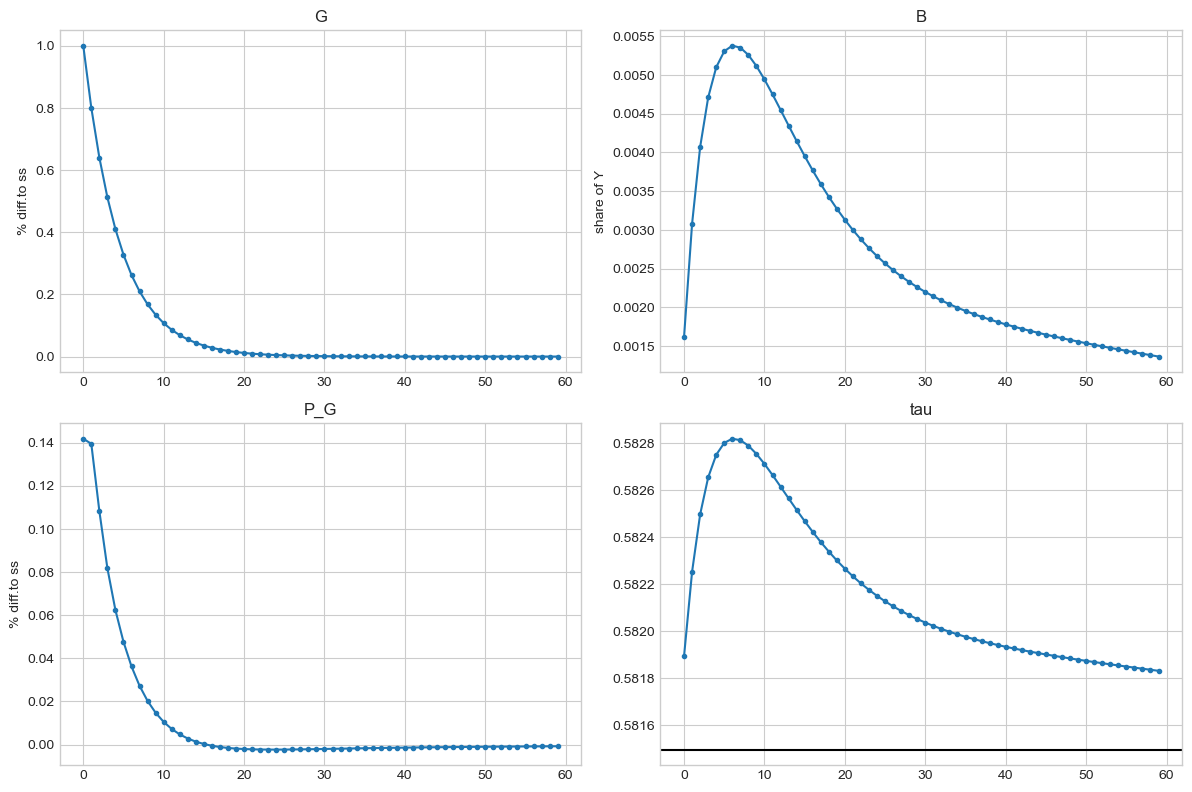

In [10]:
model.plot_IRF(varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'], ncol=2)

### 4.2. <a id='toc4_2_'></a>[Effect on production firms, Phillips-curve and investments](#toc0_)

#### 4.2.1. <a id='toc4_2_1_'></a>[Effect on production firms](#toc0_)

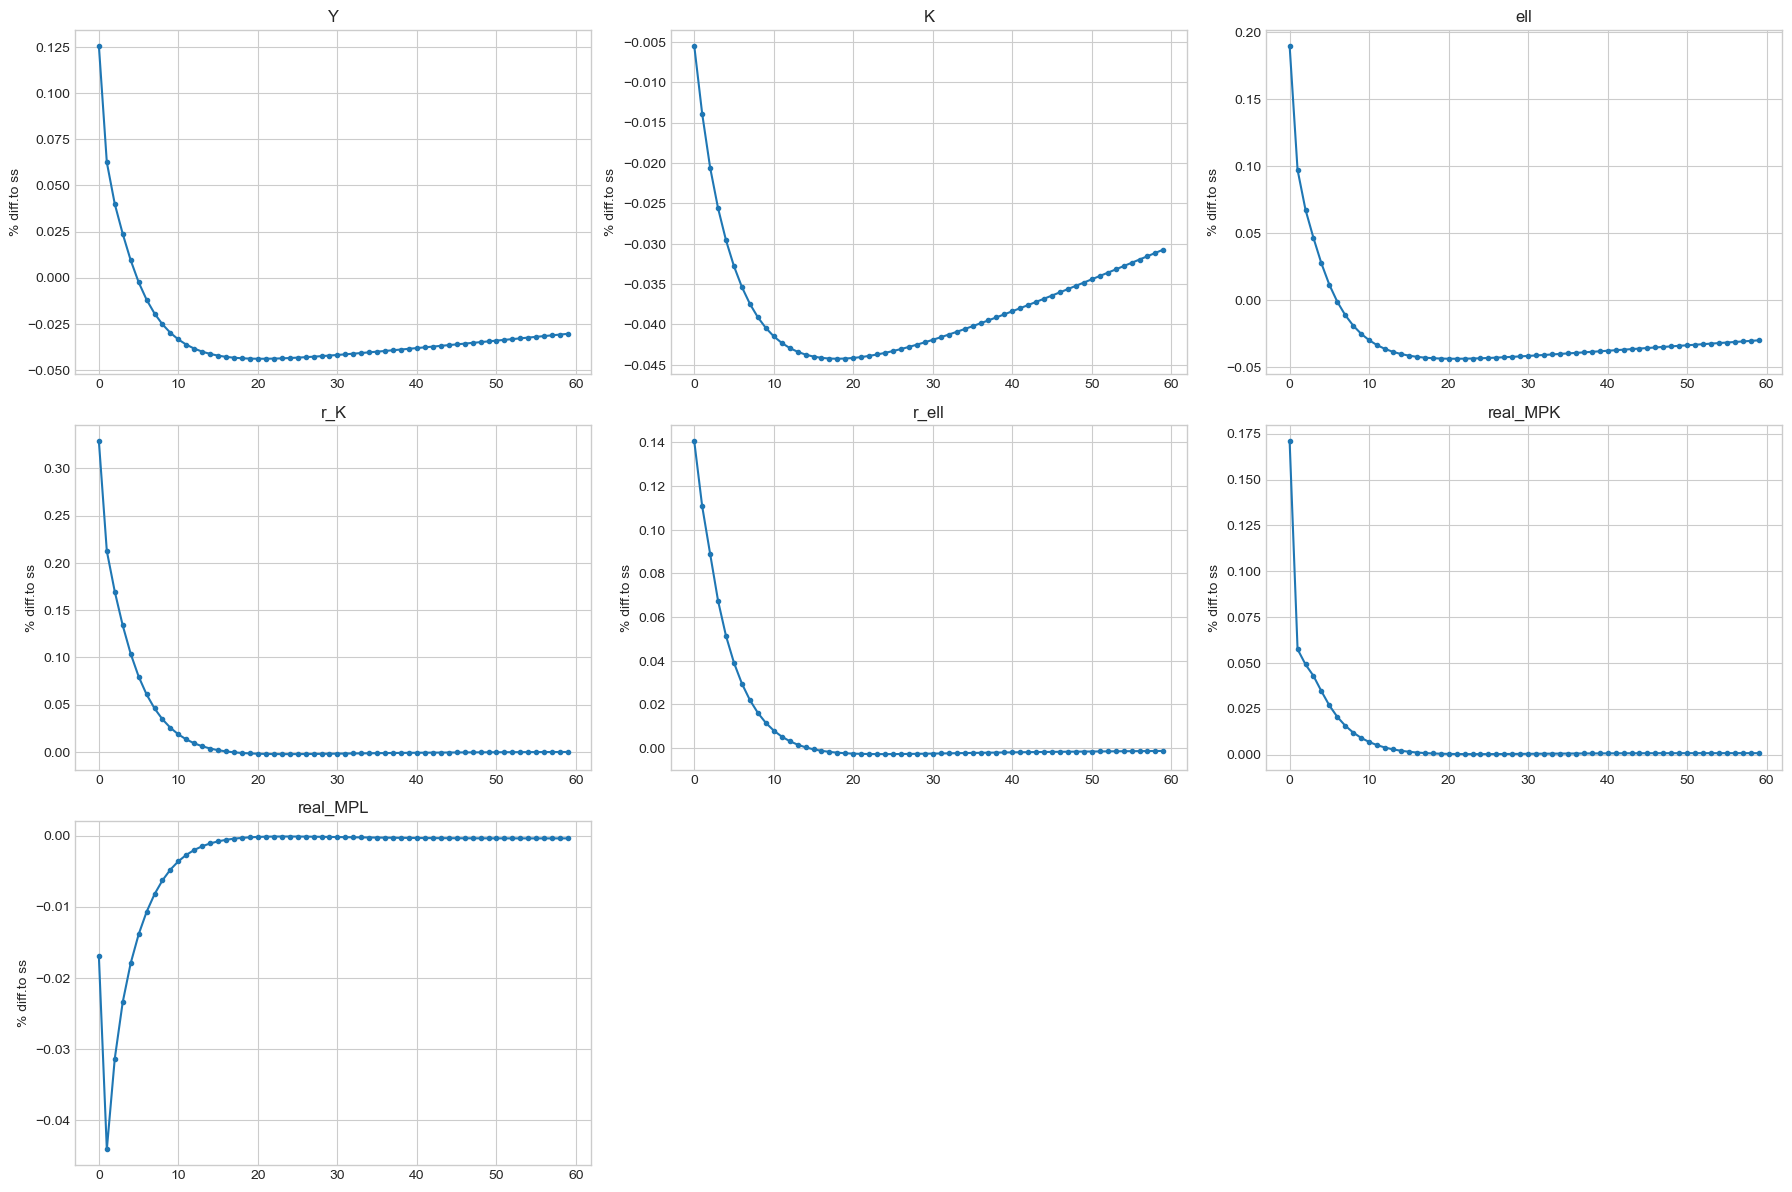

In [11]:
model.plot_IRF(varlist=['Y','K','ell','r_K','r_ell','real_MPK','real_MPL'])

#### 4.2.2. <a id='toc4_2_2_'></a>[Effect on Phillips-curve](#toc0_)

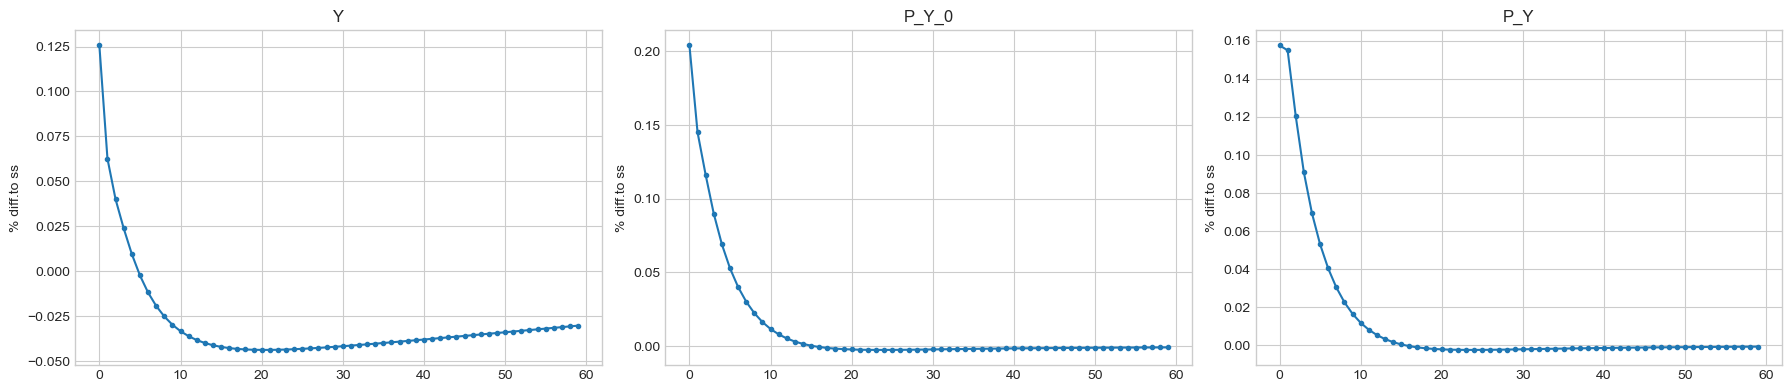

In [12]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'])

#### 4.2.3. <a id='toc4_2_3_'></a>[Effect on investments](#toc0_)

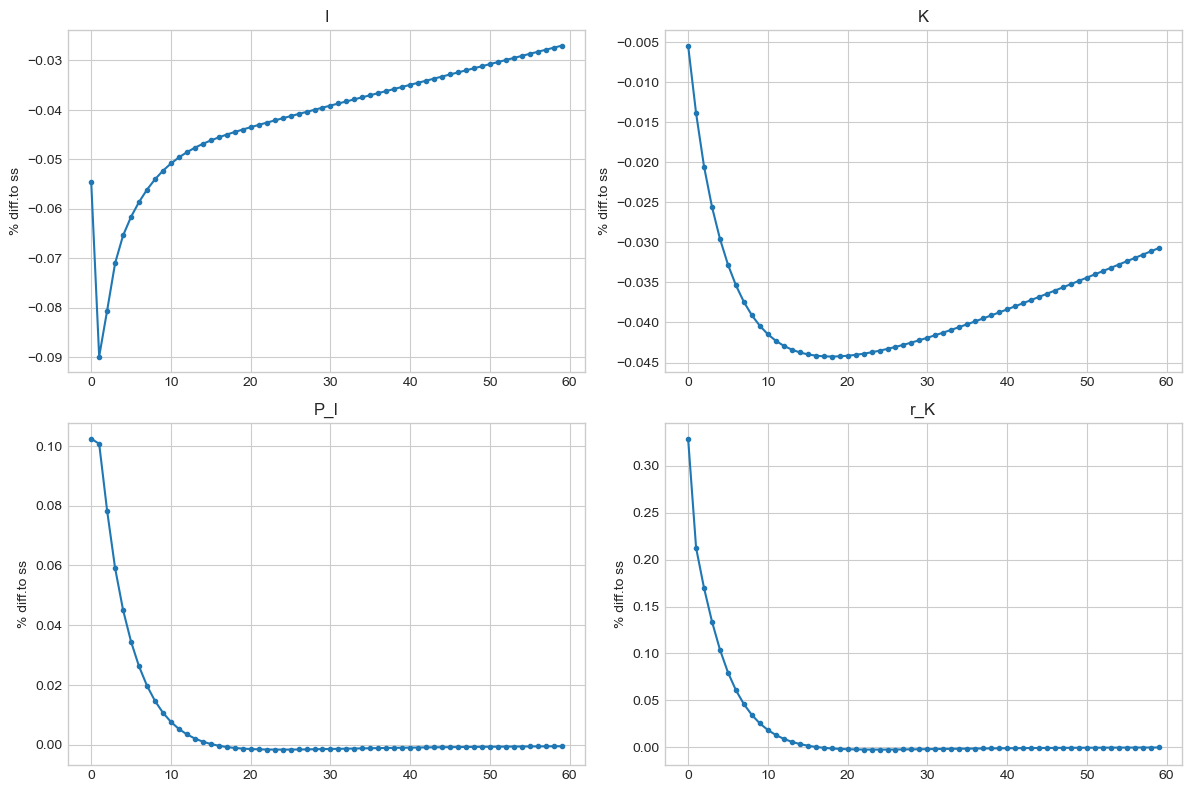

In [13]:
model.plot_IRF(varlist=['I','K','P_I','r_K'],ncol=2)

### 4.3. <a id='toc4_3_'></a>[Labor market](#toc0_)

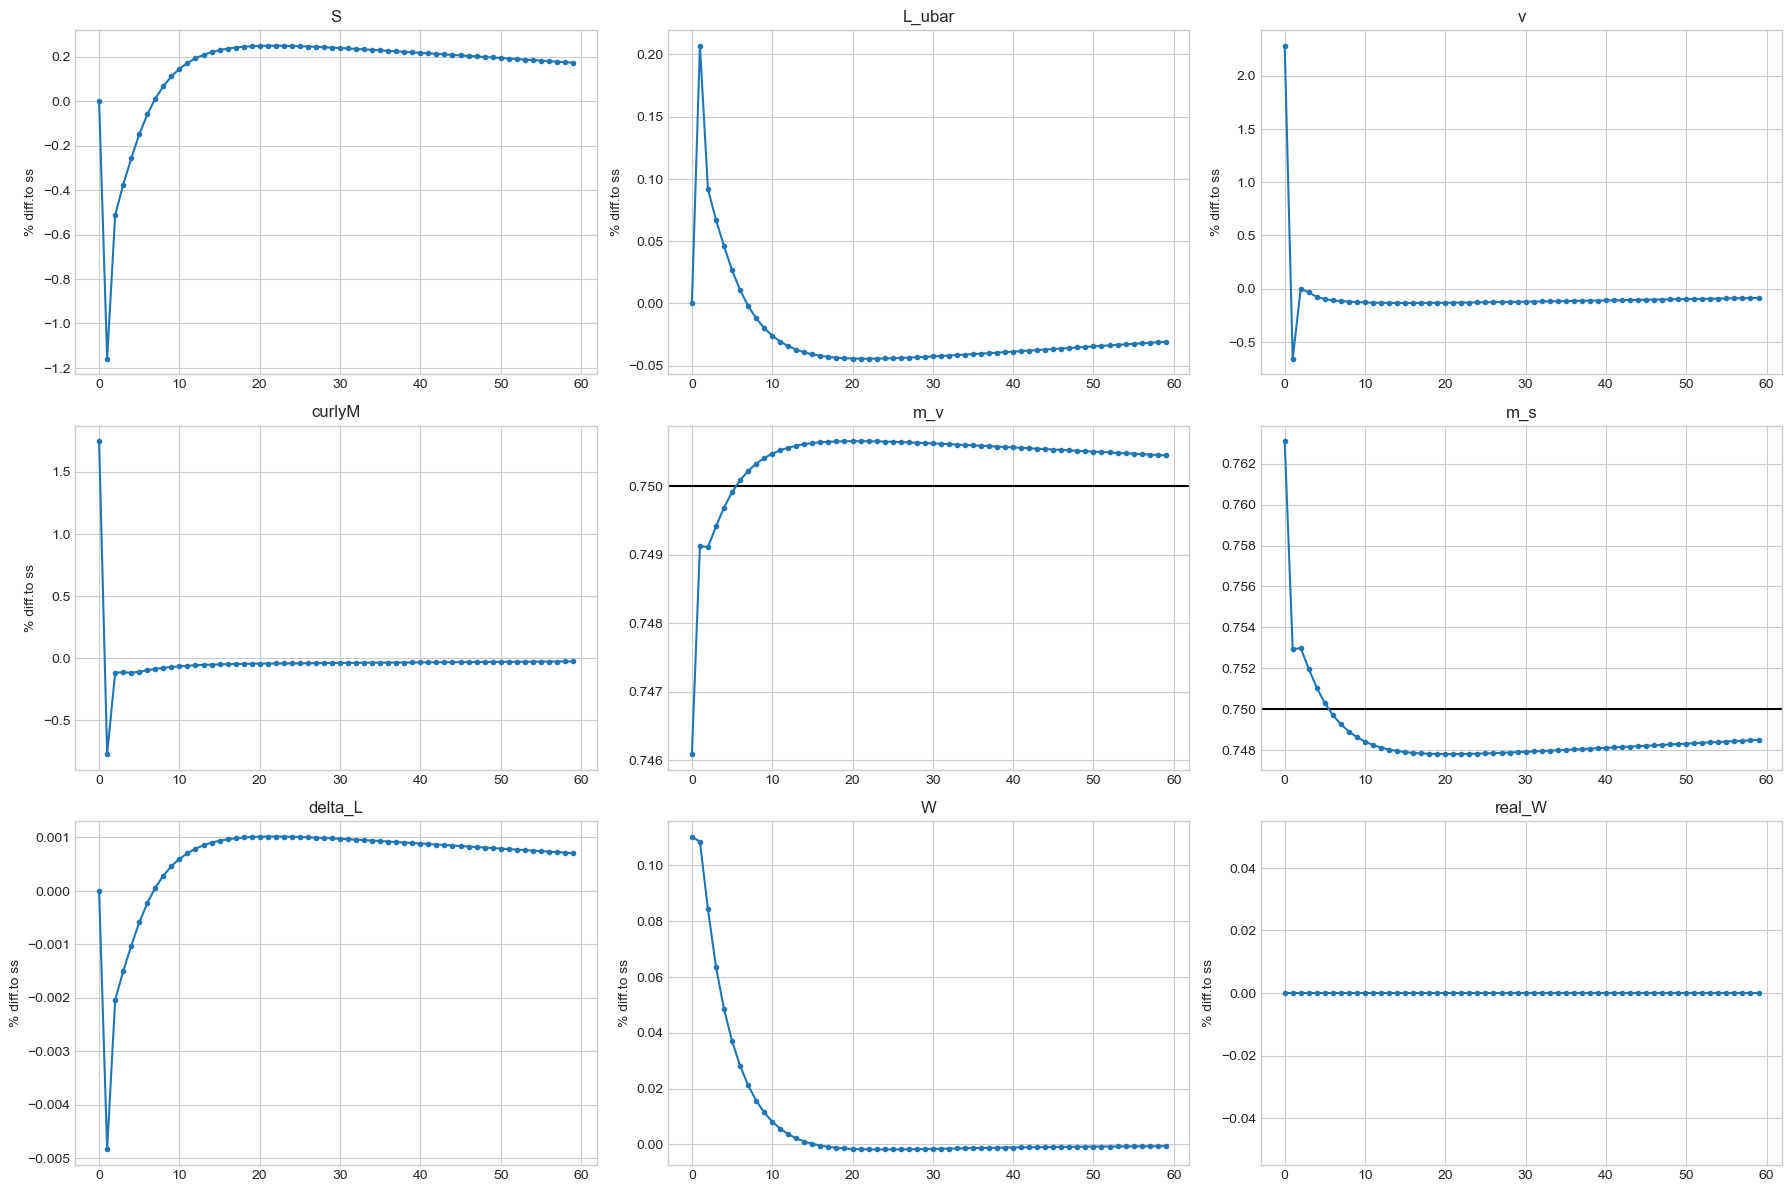

In [14]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 4.4. <a id='toc4_4_'></a>[Effect on consumption](#toc0_)

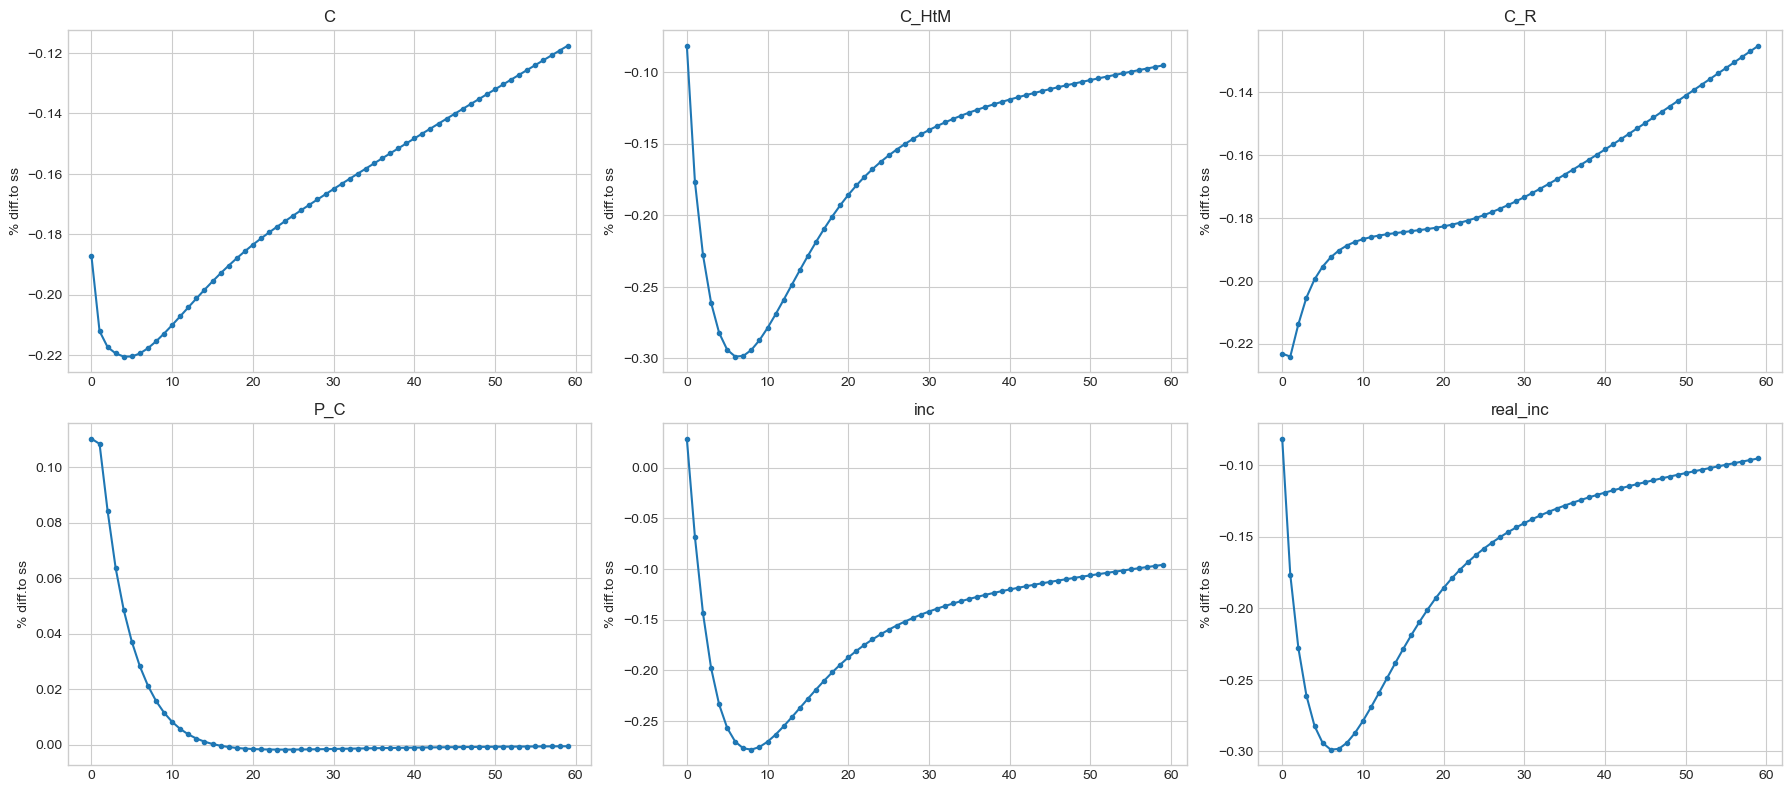

In [15]:
model.plot_IRF(varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3)

#### 4.4.1. <a id='toc4_4_1_'></a>[Effect on bequest and savings](#toc0_)

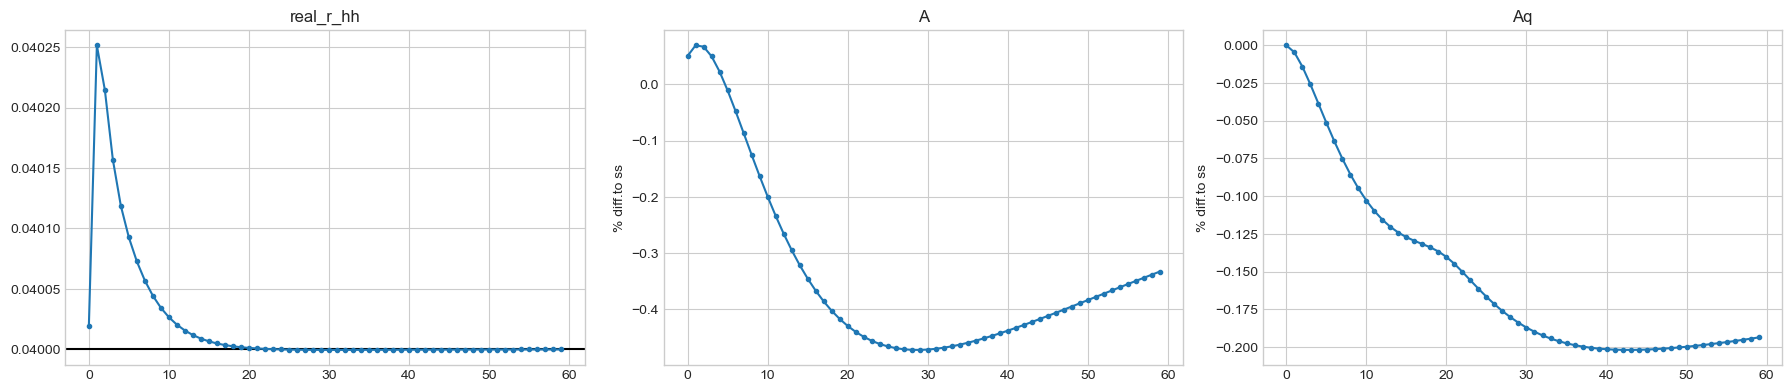

In [16]:
model.plot_IRF(varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

### 4.5. <a id='toc4_5_'></a>[Effect on exports](#toc0_)

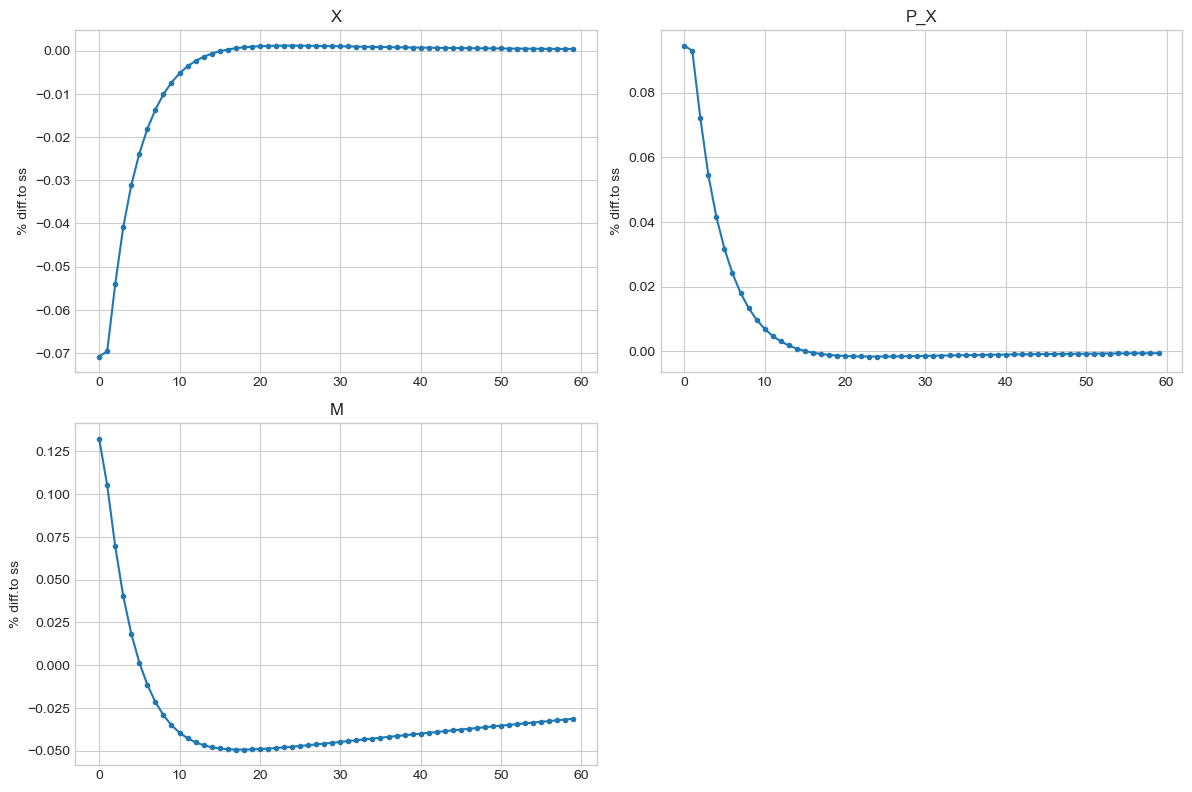

In [17]:
model.plot_IRF(varlist=['X','P_X','M'], ncol=2)

#### 4.5.1. <a id='toc4_5_1_'></a>[Other](#toc0_)

#### 4.5.2. <a id='toc4_5_2_'></a>[Households lifecycle](#toc0_)

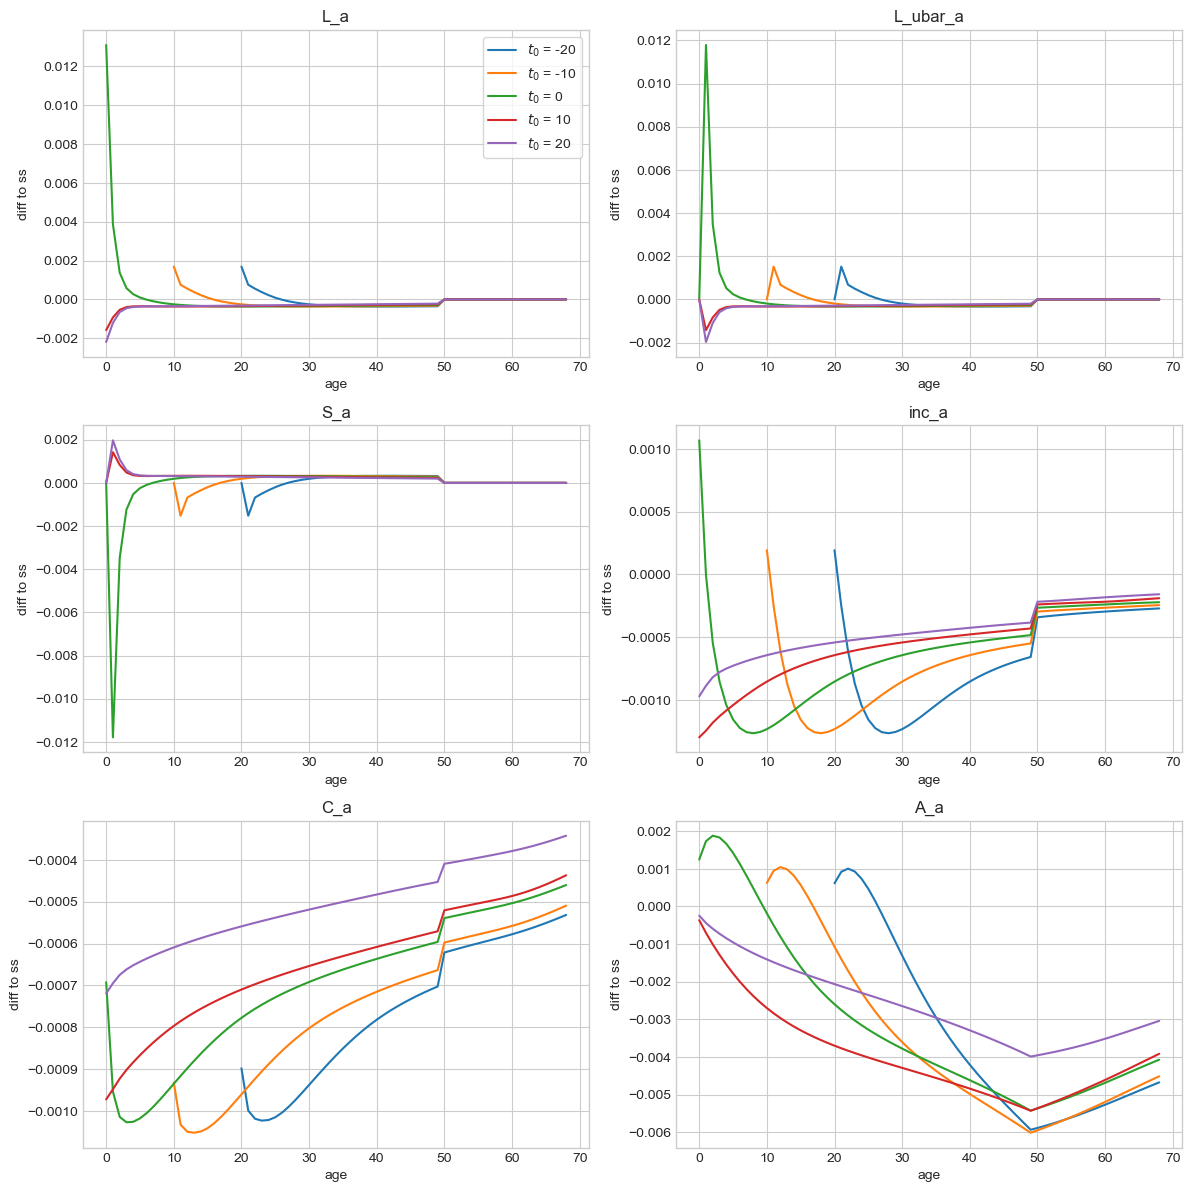

In [18]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])